In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Crop_recommendation (1).csv')

In [ ]:
df.label.value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=  df['label'].map(crop_dict)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.label.value_counts()

,count
label,
20,100
11,100
8,100
6,100
4,100
17,100
16,100
0,100
15,100


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
crop_num,0


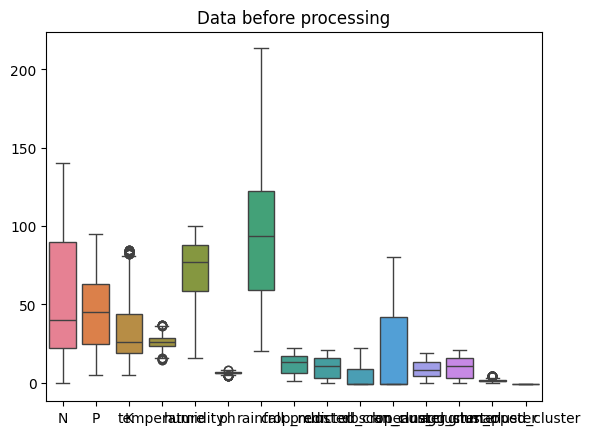

In [ ]:
sns.boxplot(data=df)
plt.title("Data before processing")
plt.show()

In [ ]:
df=df.drop(['label'],axis=1)

In [ ]:
df.crop_num.value_counts()


,count
crop_num,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [ ]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
df=df[~((df<lower_bound)|(df>upper_bound)).any(axis=1)]

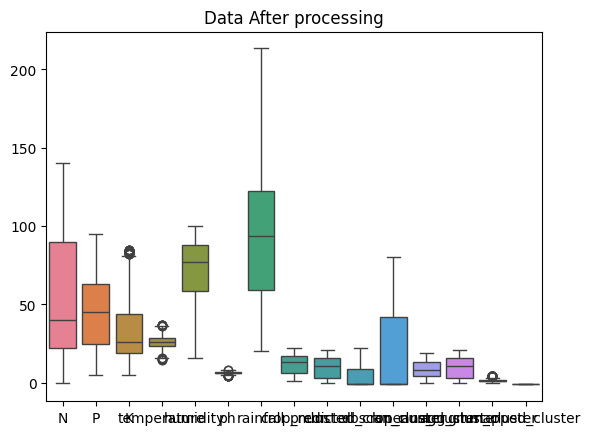

In [ ]:
sns.boxplot(data=df)
plt.title("Data After processing")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'crop_num'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled,X_train_scaled

(array([[-0.4551604 , -1.14994179, -0.06577153, ..., -0.94945362,
         -0.92475294, -0.15741738],
        [-0.6106945 ,  1.02496528, -0.81562759, ..., -2.35571108,
         -1.43088053,  1.05576935],
        [-0.5070051 ,  0.53672083, -1.00309161, ..., -0.58300116,
          2.69469445, -0.84765671],
        ...,
        [ 0.11513127,  0.44794912,  0.2466685 , ...,  0.47944977,
          0.9716677 ,  1.07401183],
        [-1.38836496, -0.30661048,  0.05920448, ..., -0.76088506,
         -2.65258527, -0.16632506],
        [ 1.12610288,  1.24689457,  1.30896458, ...,  0.5053091 ,
         -0.90013149,  0.41788596]]),
 array([[-0.6106945 , -0.88362664,  0.18418049, ...,  0.71679448,
         -0.86863765,  0.17834527],
        [-1.44020966, -0.70608321, -0.00328352, ...,  1.29281516,
         -0.90524845,  1.50552713],
        [ 1.25571462,  0.09286225, -0.8781156 , ...,  0.31952118,
          1.71559652, -0.15524234],
        ...,
        [ 1.02241348,  1.33566629,  1.12150057, ...,  

In [ ]:
def plot_confusion_matrix(y_test, y_pred,title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
    disp.plot()
    plt.title(f"Confusion Matrix for {title} Clustering")
    plt.show()

Naive Bayes Accuracy: 99.06%
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      0.97      0.98        30
           3       0.95      0.88      0.91        24
           4       0.96      1.00      0.98        24
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        33
          17       1.00      1.00      1.00        31
          18       1.00      1.00      1.00        19
          19       1.00      

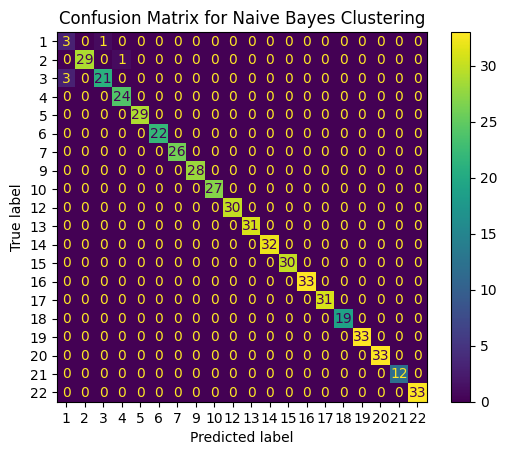

In [ ]:
#Naive Bayes cluster
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
y_pred = naive_bayes.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred,"Naive Bayes")

In [ ]:

import numpy as np

# Assuming your model is named 'naive_bayes' and the scaler is 'scaler'
# from the provided code.

input_data = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])

# Scale the input data using the same scaler used for training
input_data_scaled = scaler.transform(input_data)

# Make the prediction
predicted_crop_num = naive_bayes.predict(input_data_scaled)[0]

# Reverse the mapping to get the crop name
crop_dict_reversed = {v: k for k, v in crop_dict.items()}
predicted_crop = crop_dict_reversed[predicted_crop_num]

print(f"The predicted crop is: {predicted_crop}")

The predicted crop is: rice


In [ ]:
import joblib

joblib.dump(naive_bayes, 'naive_bayes_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


hierarchical clustering-AgglomerativeClustering Accuracy of cluster-crop mapping: 85.63%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       1.00      0.96      0.98       100
           3       0.70      0.99      0.82       100
           4       0.96      1.00      0.98       100
           5       1.00      0.98      0.99        85
           6       1.00      0.81      0.90        54
           7       1.00      1.00      1.00        83
           9       0.50      1.00      0.67       100
          10       0.00      0.00      0.00       100
          12       0.84      1.00      0.91        98
          13       1.00      1.00      1.00       100
          14       0.98      1.00      0.99       100
          15       0.59      0.88      0.70       100
          16       0.80      0.86      0.83       100
          17       1.00      1.00      1.00       100
          18       0.00      0.00      0.00   

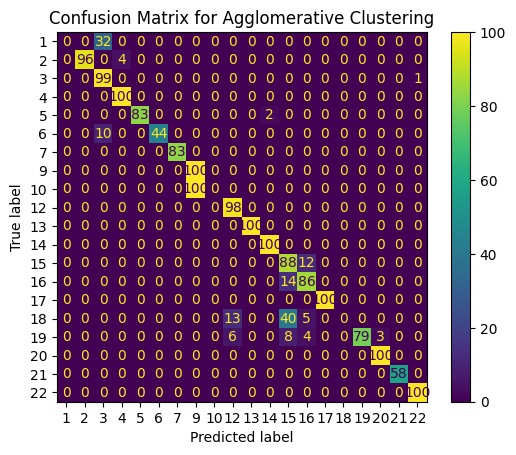

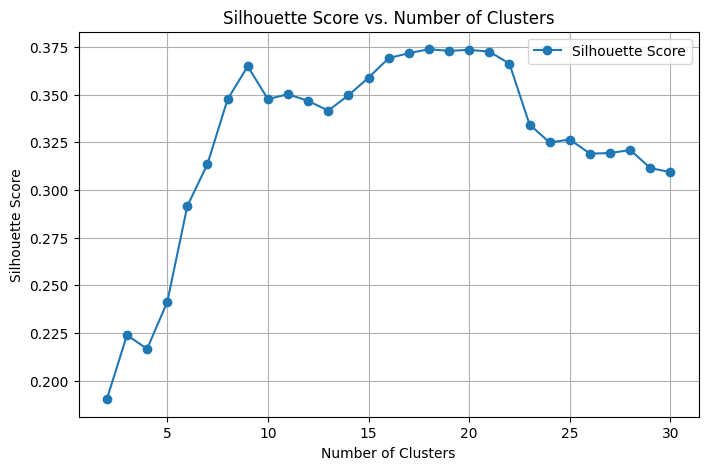

In [ ]:
#hierarchical clustering-AgglomerativeClustering
features_for_clustering = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X_cluster = df[features_for_clustering]
cluster_range = range(2, 31)

X_cluster_scaled = scaler.fit_transform(X_cluster)


n_clusters = 22
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['cluster'] = agg_clustering.fit_predict(X_cluster_scaled)

cluster_crop_mapping = {}
for cluster_num in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    most_frequent_crop = cluster_data['crop_num'].mode()
    if len(most_frequent_crop) > 0:
      cluster_crop_mapping[cluster_num] = most_frequent_crop[0]
    else:
      cluster_crop_mapping[cluster_num] = -1


df['predicted_crop_num'] = df['cluster'].map(cluster_crop_mapping)

accuracy = accuracy_score(df['crop_num'], df['predicted_crop_num'])
print(f"hierarchical clustering-AgglomerativeClustering Accuracy of cluster-crop mapping: {accuracy * 100:.2f}%")

print(classification_report(df['crop_num'], df['predicted_crop_num']))

sil_scores = []
cluster_range = range(2, 31)  # Test from 2 to 30 clusters
for n_clusters in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clustering.fit_predict(X_cluster_scaled)
    sil_score = silhouette_score(X_cluster_scaled, labels)
    sil_scores.append(sil_score)

optimal_clusters = cluster_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")
cm = confusion_matrix(df['crop_num'], df['predicted_crop_num'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df['crop_num']))

disp.plot()
plt.title("Confusion Matrix for Agglomerative Clustering")
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sil_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid()
plt.show()

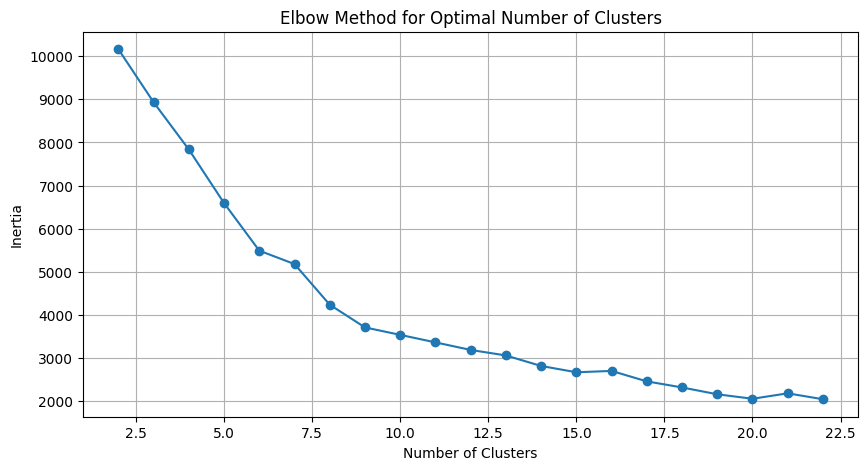

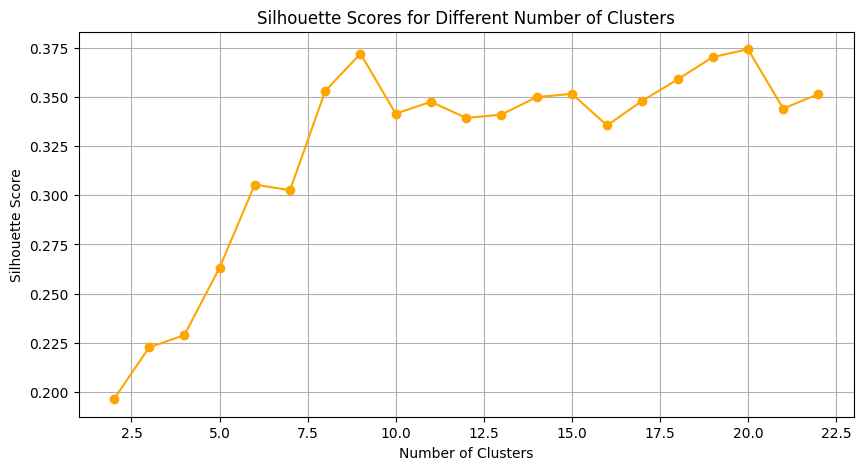

Accuracy of KMeans cluster-crop mapping: 81.22%
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.74      0.96      0.83       100
           3       0.69      1.00      0.82       100
           4       0.96      0.66      0.78       100
           5       1.00      1.00      1.00        85
           6       1.00      0.78      0.88        54
           7       1.00      1.00      1.00        83
           9       0.00      0.00      0.00       100
          10       0.50      1.00      0.67       100
          12       0.75      1.00      0.86        98
          13       1.00      1.00      1.00       100
          14       1.00      1.00      1.00       100
          15       0.76      0.67      0.71       100
          16       0.60      0.95      0.73       100
          17       0.97      1.00      0.99       100
          18       0.00      0.00      0.00        58
          

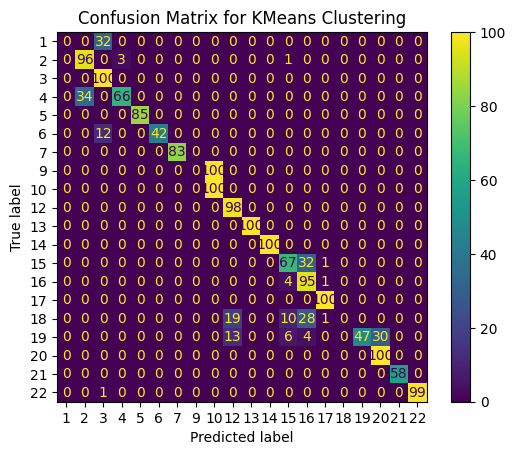

In [ ]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
sil_scores = []
cluster_range = range(2, 23)
from sklearn.cluster import KMeans

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, sil_scores, marker='o', label='Silhouette Score', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.grid()
plt.show()

optimal_k = cluster_range[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

cluster_crop_mapping = {}
for cluster_num in range(optimal_k):
    cluster_data = df[df['kmeans_cluster'] == cluster_num]
    crop_counts = cluster_data['crop_num'].value_counts()

    if len(crop_counts) > 0:
        most_frequent_crop = crop_counts.idxmax()
        cluster_crop_mapping[cluster_num] = most_frequent_crop
    else:
        cluster_crop_mapping[cluster_num] = -1

# Map cluster labels to crop numbers
df['predicted_crop_num'] = df['kmeans_cluster'].map(cluster_crop_mapping)

# Evaluate the mapping
accuracy = accuracy_score(df['crop_num'], df['predicted_crop_num'])
print(f"Accuracy of KMeans cluster-crop mapping: {accuracy * 100:.2f}%")

# Print classification report
print("Classification Report:")
print(classification_report(df['crop_num'], df['predicted_crop_num']))

# Display confusion matrix
cm = confusion_matrix(df['crop_num'], df['predicted_crop_num'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df['crop_num']))
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for KMeans Clustering")
plt.show()


Accuracy of DBSCAN cluster-crop mapping (excluding noise): 87.86%
Classification Report (excluding noise):
              precision    recall  f1-score   support

           1       0.67      0.33      0.44         6
           2       1.00      1.00      1.00        14
           3       0.89      0.97      0.93        35
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        13
           9       0.54      1.00      0.70       100
          10       1.00      0.11      0.21        96
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        77
          14       1.00      1.00      1.00        62
          15       1.00      0.91      0.95        32
          16       0.95      1.00      0.97        55
          17       1.00      1.00      1.00        93
          20       1.00      1.00      1.00        39
          21       1.00     

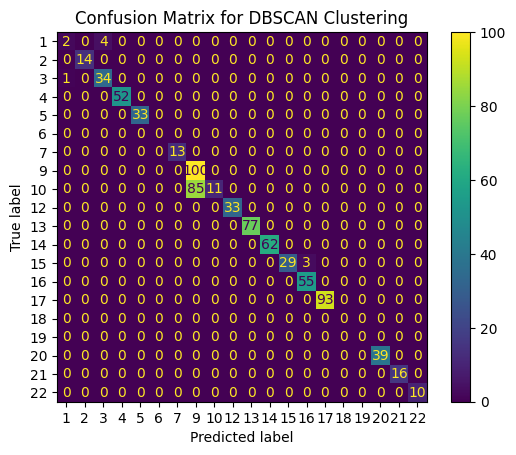

Silhouette Score (excluding noise): 0.26


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Step 2: Map clusters to the most frequent crop number
cluster_crop_mapping = {}
for cluster_num in np.unique(df['dbscan_cluster']):
    if cluster_num != -1:  # Exclude noise points
        cluster_data = df[df['dbscan_cluster'] == cluster_num]
        crop_counts = cluster_data['crop_num'].value_counts()
        most_frequent_crop = crop_counts.idxmax()
        cluster_crop_mapping[cluster_num] = most_frequent_crop
    else:
        cluster_crop_mapping[cluster_num] = -1  # Noise points get a special mapping
# Map DBSCAN cluster labels to the most frequent crop number
cluster_crop_mapping = {}
for cluster_num in np.unique(df['dbscan_cluster']):
    if cluster_num != -1:  # Exclude noise points
        cluster_data = df[df['dbscan_cluster'] == cluster_num]
        crop_counts = cluster_data['crop_num'].value_counts()

        # Check if there are points in the cluster
        if not crop_counts.empty:
            most_frequent_crop = crop_counts.idxmax()
            cluster_crop_mapping[cluster_num] = most_frequent_crop
        else:
            cluster_crop_mapping[cluster_num] = -1  # Handle empty clusters
    else:
        cluster_crop_mapping[cluster_num] = -1  # Noise points get a special mapping

# Map DBSCAN cluster labels to crop numbers
df['predicted_crop_num'] = df['dbscan_cluster'].map(cluster_crop_mapping)

# Step 3: Evaluate the mapping
valid_points_mask = df['dbscan_cluster'] != -1  # Exclude noise points for evaluation
if valid_points_mask.sum() > 0:  # Ensure there are valid points
    accuracy = accuracy_score(df.loc[valid_points_mask, 'crop_num'], df.loc[valid_points_mask, 'predicted_crop_num'])
    print(f"Accuracy of DBSCAN cluster-crop mapping (excluding noise): {accuracy * 100:.2f}%")

    # Print classification report
    print("Classification Report (excluding noise):")
    print(classification_report(df.loc[valid_points_mask, 'crop_num'], df.loc[valid_points_mask, 'predicted_crop_num']))

   # Generate the confusion matrix
    cm = confusion_matrix(
    df.loc[valid_points_mask, 'crop_num'],
    df.loc[valid_points_mask, 'predicted_crop_num'],
    labels=np.unique(df['crop_num'])  # Ensure matching crop labels
      )

# Use consistent labels for display
    unique_labels = np.unique(df['crop_num'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

# Plot the confusion matrix
    disp.plot(cmap='viridis')
    plt.title("Confusion Matrix for DBSCAN Clustering")
    plt.show()

else:
    print("No valid clusters for evaluation.")

# Step 4: Calculate Silhouette Score (excluding noise points)
if valid_points_mask.sum() > 1:
    dbscan_silhouette = silhouette_score(X_scaled[valid_points_mask], df.loc[valid_points_mask, 'dbscan_cluster'])
    print(f"Silhouette Score (excluding noise): {dbscan_silhouette:.2f}")
else:
    print("Not enough valid clusters to compute Silhouette Score.")


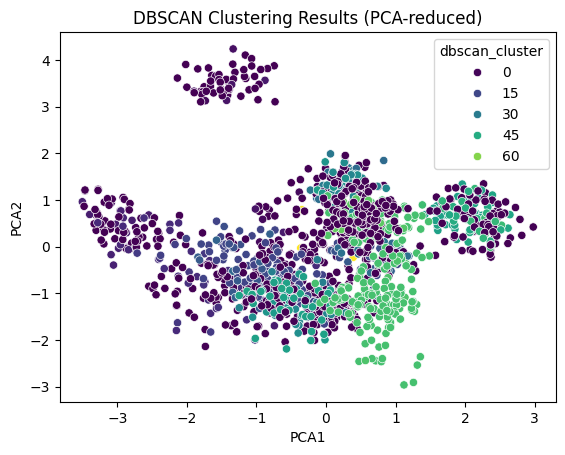

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['dbscan_cluster'] = df['dbscan_cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='dbscan_cluster', palette='viridis')
plt.title("DBSCAN Clustering Results (PCA-reduced)")
plt.show()


In [ ]:

# 1. **Naive Bayes Classifier**

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test_scaled)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# 2. Clustering Models for Comparison

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Increase eps or min_samples
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Evaluate DBSCAN (silhouette score)
silhouette_dbscan = silhouette_score(X_train_scaled, dbscan_labels)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

# **Gaussian Mixture Model (GMM)**
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(X_train_scaled)
# Evaluate GMM (silhouette score)
silhouette_gmm = silhouette_score(X_train_scaled, gmm_labels)
print("GMM Silhouette Score:", silhouette_gmm)

print("\n--- Model Comparison ---")
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
print(f"GMM Silhouette Score: {silhouette_gmm}")


Naive Bayes Accuracy: 0.9905838041431262
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       1.00      0.97      0.98        30
           3       0.95      0.88      0.91        24
           4       0.96      1.00      0.98        24
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        33
          17       1.00      1.00      1.00        31
          18       1.00      1.00      1.00        19
  

Accuracy of GMM cluster-crop mapping (excluding noise): 91.35%
Classification Report (excluding noise):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       1.00      0.99      0.99       100
           3       0.76      1.00      0.86       100
           4       0.99      1.00      1.00       100
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        83
           9       0.50      1.00      0.67       100
          10       0.00      0.00      0.00       100
          12       1.00      1.00      1.00        98
          13       1.00      1.00      1.00       100
          14       1.00      1.00      1.00       100
          15       0.86      1.00      0.93       100
          16       1.00      1.00      1.00       100
          17       1.00      1.00      1.00       100
          18       0.91      0.

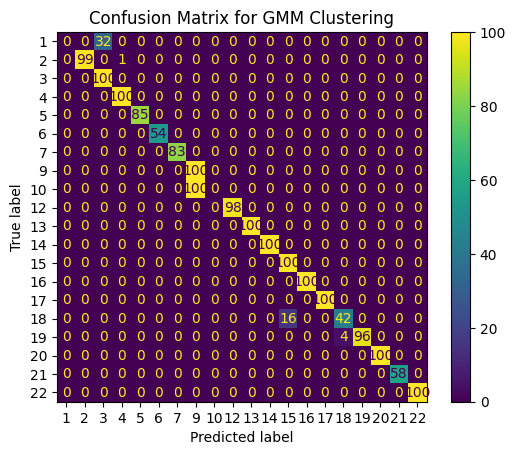

Silhouette Score (excluding noise): 0.34


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fit GMM
gmm = GaussianMixture(n_components=22, random_state=42)  # Adjust n_components as needed
df['gmm_cluster'] = gmm.fit_predict(X_scaled)

# Step 2: Map clusters to the most frequent crop number using mode
cluster_crop_mapping = {}
for cluster_num in np.unique(df['gmm_cluster']):
    cluster_data = df[df['gmm_cluster'] == cluster_num]
    most_frequent_crop = cluster_data['crop_num'].mode()  # Get the mode value for the cluster

    if len(most_frequent_crop) > 0:
        cluster_crop_mapping[cluster_num] = most_frequent_crop[0]  # Assign the mode value
    else:
        cluster_crop_mapping[cluster_num] = -1  # Handle empty clusters (if any)

# Map GMM cluster labels to crop numbers using the mode
df['predicted_crop_num'] = df['gmm_cluster'].map(cluster_crop_mapping)

# Step 3: Evaluate the mapping
valid_points_mask = df['gmm_cluster'] != -1  # Exclude noise points for evaluation
if valid_points_mask.sum() > 0:  # Ensure there are valid points
    accuracy = accuracy_score(df.loc[valid_points_mask, 'crop_num'], df.loc[valid_points_mask, 'predicted_crop_num'])
    print(f"Accuracy of GMM cluster-crop mapping (excluding noise): {accuracy * 100:.2f}%")

    # Print classification report
    print("Classification Report (excluding noise):")
    print(classification_report(df.loc[valid_points_mask, 'crop_num'], df.loc[valid_points_mask, 'predicted_crop_num']))

    # Generate the confusion matrix
    cm = confusion_matrix(
        df.loc[valid_points_mask, 'crop_num'],
        df.loc[valid_points_mask, 'predicted_crop_num'],
        labels=np.unique(df['crop_num'])  # Ensure matching crop labels
    )

    # Use consistent labels for display
    unique_labels = np.unique(df['crop_num'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

    # Plot the confusion matrix
    disp.plot(cmap='viridis')
    plt.title("Confusion Matrix for GMM Clustering")
    plt.show()
else:
    print("No valid clusters for evaluation.")

# Step 4: Calculate Silhouette Score (excluding noise points)
if valid_points_mask.sum() > 1:
    gmm_silhouette = silhouette_score(X_scaled[valid_points_mask], df.loc[valid_points_mask, 'gmm_cluster'])
    print(f"Silhouette Score (excluding noise): {gmm_silhouette:.2f}")
else:
    print("Not enough valid clusters to compute Silhouette Score.")


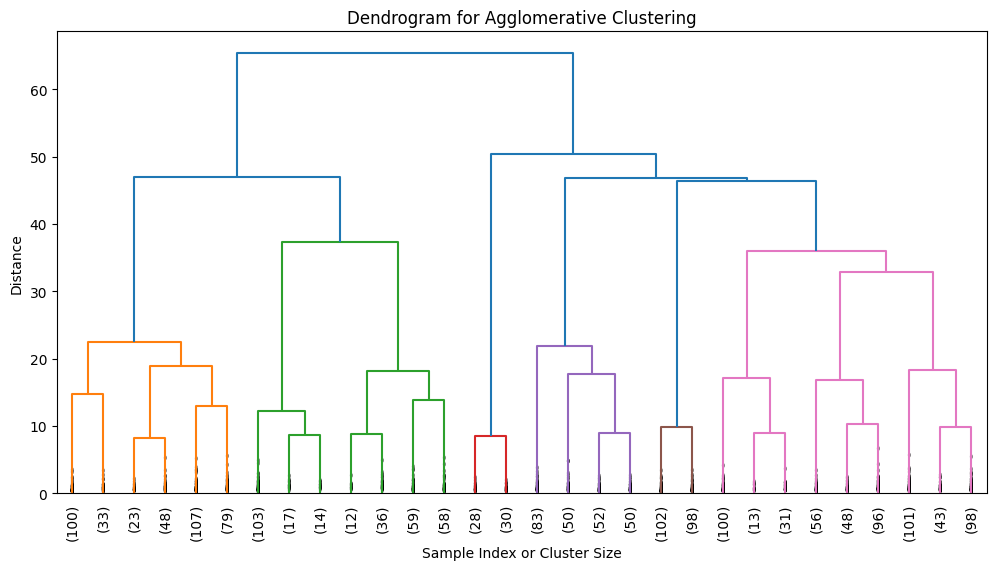

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data if not already scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')  # You can use 'ward', 'complete', 'average', etc.

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()


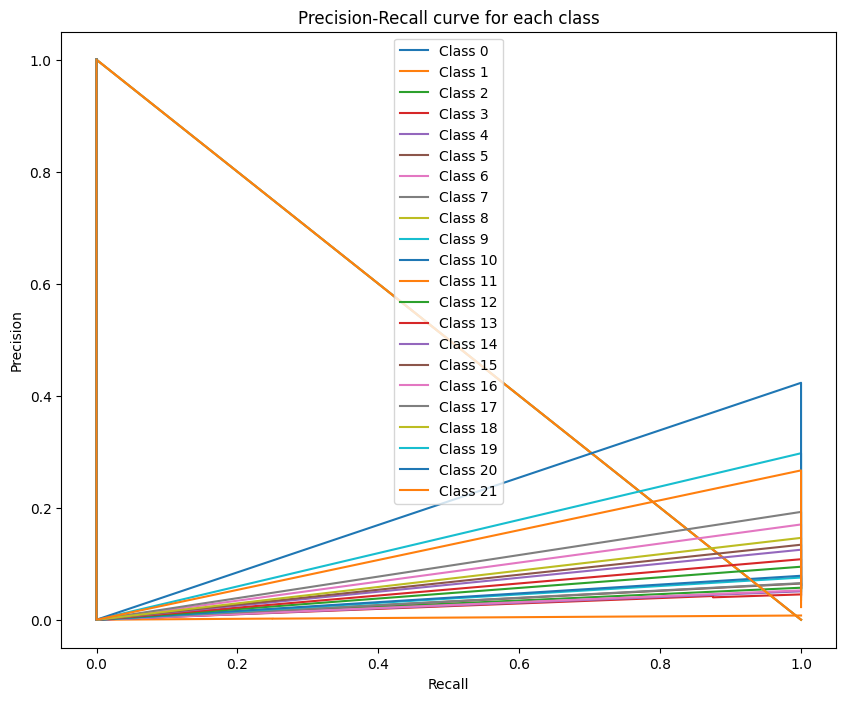

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(22):  # Assuming 22 classes
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred)  # Use y_pred directly as it's 1D
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for each class')
plt.legend()
plt.show()


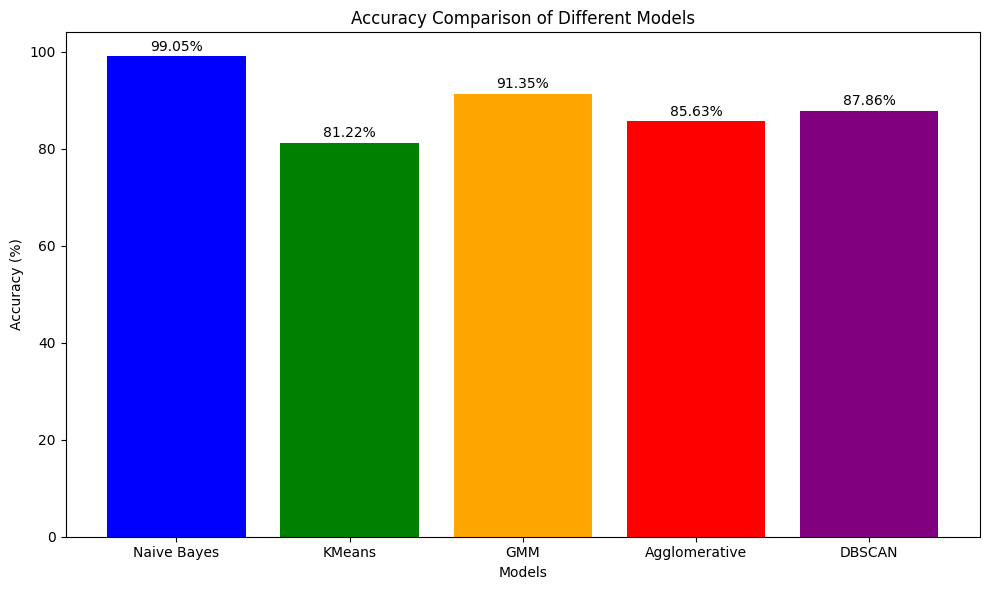

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: accuracy values for different models
models = ['Naive Bayes', 'KMeans', 'GMM', 'Agglomerative', 'DBSCAN']
accuracies = [99.05, 81.22, 91.35, 85.63, 87.86]  # Replace with your actual accuracy values

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add title and labels
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Show the accuracy values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


DBSCAN did not find valid clusters in the test set, skipping ROC calculation.


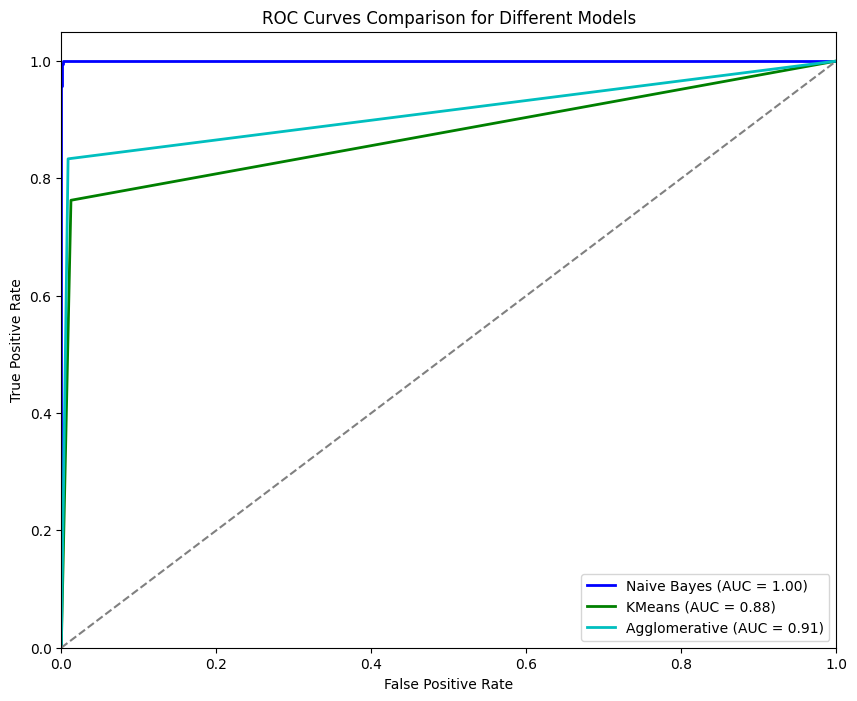


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       1.00      0.95      0.97        19
           3       0.93      0.88      0.90        16
           4       0.95      1.00      0.97        18
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        26
          15       0.95      1.00      0.97        18
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        18
          18       1.00      0.93      0.96        14
          19       1.00      1.00      1.00  

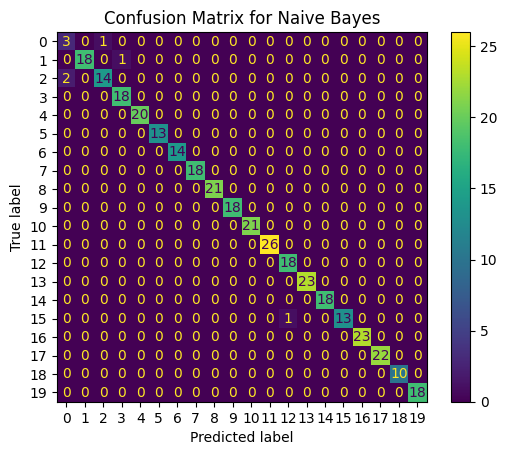


KMeans Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.38      0.68      0.49        19
           3       0.50      1.00      0.67        16
           4       0.86      1.00      0.92        18
           5       0.95      0.95      0.95        20
           6       0.00      0.00      0.00        13
           7       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       0.96      1.00      0.98        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        23
          17       0.62      1.00      0.77        18
          18       0.31      0.86      0.45        14
          19       0.96      0.96      0.96       

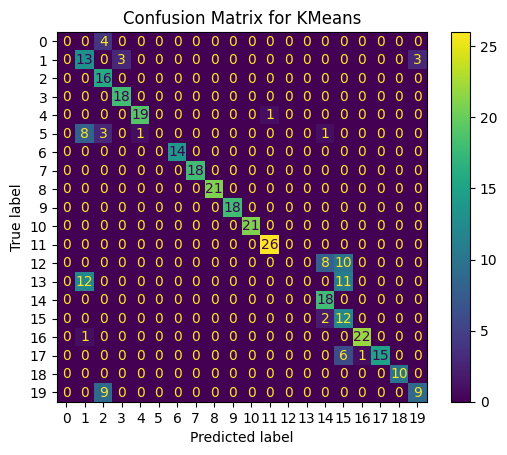


DBSCAN Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       4.0
           2       0.00      0.00      0.00      19.0
           3       0.00      0.00      0.00      16.0
           4       0.00      0.00      0.00      18.0
           5       0.00      0.00      0.00      20.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00      14.0
           9       0.00      0.00      0.00      18.0
          10       0.00      0.00      0.00      21.0
          12       0.00      0.00      0.00      18.0
          13       0.00      0.00      0.00      21.0
          14       0.00      0.00      0.00      26.0
          15       0.00      0.00      0.00      18.0
          16       0.00      0.00      0.00      23.0
          17       0.00      0.00      0.00      18.0
          18       0.00      0.00      0.00      1

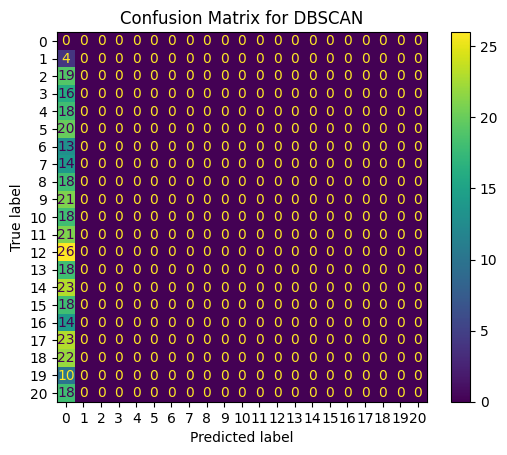


Agglomerative Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       1.00      0.84      0.91        19
           3       0.53      1.00      0.70        16
           4       0.90      1.00      0.95        18
           5       1.00      1.00      1.00        20
           6       1.00      0.85      0.92        13
           7       1.00      1.00      1.00        14
           9       0.00      0.00      0.00        18
          10       0.54      1.00      0.70        21
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        26
          15       0.56      1.00      0.72        18
          16       0.96      1.00      0.98        23
          17       1.00      1.00      1.00        18
          18       0.00      0.00      0.00        14
          19       0.70      1.00      0.82

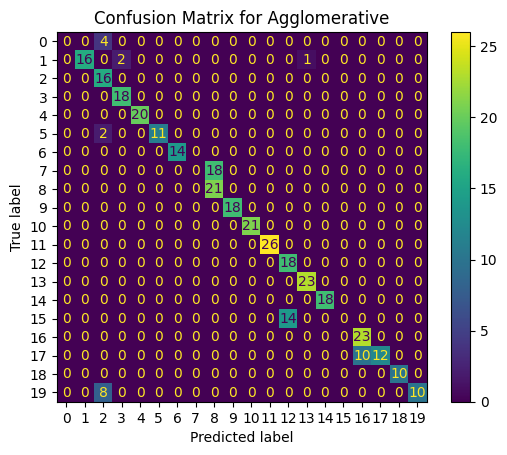

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import numpy as np

# Assume df is your dataframe with the data and 'crop_num' is the target column
# X = your features
# y = target column ('crop_num')

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the labels for multi-class ROC (One-vs-Rest approach)
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Step 2: Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "KMeans": KMeans(n_clusters=len(np.unique(y_train)), random_state=42),
    "DBSCAN": DBSCAN(eps=0.7, min_samples=3),
    "Agglomerative": AgglomerativeClustering(n_clusters=len(np.unique(y_train)))
}

# Step 3: Train models and predict
y_preds = {}
y_probs = {}

for model_name, model in models.items():
    model.fit(X_train,y_train)

    if model_name == "Naive Bayes":
        # For Naive Bayes, use predict_proba to get probabilities
        y_preds[model_name] = model.predict(X_test)
        y_probs[model_name] = model.predict_proba(X_test)
    elif model_name in ["KMeans", "DBSCAN", "Agglomerative"]:
        # For clustering models, use predict (mapping clusters to real classes is necessary)
        if model_name == "DBSCAN":
            # DBSCAN returns -1 for noise, which should be excluded for comparison
            y_preds[model_name] = model.fit_predict(X_test)
            y_preds[model_name] = np.where(y_preds[model_name] == -1, -1, y_preds[model_name])
        else:
            y_preds[model_name] = model.fit_predict(X_test)

        # Map cluster labels to the real crop labels by majority voting (mode)
        cluster_label_mapping = {}
        for cluster_num in np.unique(y_preds[model_name]):
            if cluster_num != -1:  # Skip noise points in DBSCAN
                cluster_data = X_test[y_preds[model_name] == cluster_num]
                true_labels = y_test[y_preds[model_name] == cluster_num]
                most_frequent_label = np.bincount(true_labels).argmax()  # Majority vote for mapping
                cluster_label_mapping[cluster_num] = most_frequent_label

        # Apply the mapping
        y_preds[model_name] = np.array([cluster_label_mapping.get(label, -1) for label in y_preds[model_name]])

# Step 4: ROC Curve and AUC Calculation
plt.figure(figsize=(10, 8))

# For Naive Bayes (probabilities)
if "Naive Bayes" in models:
    fpr_nb, tpr_nb, _ = roc_curve(y_test_bin.ravel(), y_probs["Naive Bayes"].ravel())
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    plt.plot(fpr_nb, tpr_nb, color='b', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# For KMeans (One-vs-Rest)
if "KMeans" in models:
    fpr_kmeans, tpr_kmeans, _ = roc_curve(y_test_bin.ravel(), lb.transform(y_preds["KMeans"]).ravel())
    roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)
    plt.plot(fpr_kmeans, tpr_kmeans, color='g', lw=2, label=f'KMeans (AUC = {roc_auc_kmeans:.2f})')

# For DBSCAN (One-vs-Rest)
if "DBSCAN" in models:
    # Only calculate ROC curve for DBSCAN if there are valid clusters (non-noise points)
    dbscan_labels = y_preds["DBSCAN"]
    valid_mask = dbscan_labels != -1  # Exclude noise points
    if np.any(valid_mask):  # Only proceed if there are valid samples
        fpr_dbscan, tpr_dbscan, _ = roc_curve(y_test_bin[valid_mask].ravel(), lb.transform(dbscan_labels[valid_mask]).ravel())
        roc_auc_dbscan = auc(fpr_dbscan, tpr_dbscan)
        plt.plot(fpr_dbscan, tpr_dbscan, color='m', lw=2, label=f'DBSCAN (AUC = {roc_auc_dbscan:.2f})')
    else:
        print("DBSCAN did not find valid clusters in the test set, skipping ROC calculation.")

# For Agglomerative (One-vs-Rest)
if "Agglomerative" in models:
    fpr_agg, tpr_agg, _ = roc_curve(y_test_bin.ravel(), lb.transform(y_preds["Agglomerative"]).ravel())
    roc_auc_agg = auc(fpr_agg, tpr_agg)
    plt.plot(fpr_agg, tpr_agg, color='c', lw=2, label=f'Agglomerative (AUC = {roc_auc_agg:.2f})')

# Step 5: Plot the ROC curves
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for Different Models')
plt.legend(loc="lower right")
plt.show()

# Step 6: Print Classification Reports and Confusion Matrices
for model_name, y_pred in y_preds.items():
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='viridis')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()
